In [1]:
using Roots  
using Plots
using ForwardDiff
using DataFrames

┌ Info: Recompiling stale cache file /Users/kuba/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187


# funkcje:

In [2]:
f1(x) = ( x + 3 ) * ( x - 1 )^2
f2(x) = x * exp(- x)
f3(x) = 2 * x - exp(- x)
f4(x) = x^3 - 2*x - 5
f5(x) = exp(x) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3
f6(x) = x^3

f6 (generic function with 1 method)

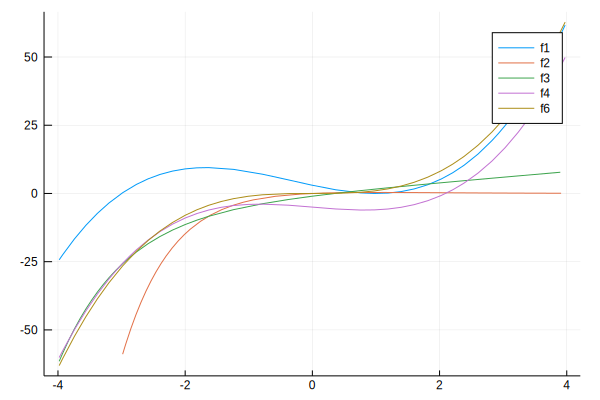

In [3]:
plot(x->f1(x),-4,4, label="f1")
plot!(x->f2(x),-3,4, label="f2")
plot!(x->f3(x),-4,4, label="f3")
plot!(x->f4(x),-4,4, label="f4")
plot!(x->f6(x),-4,4, label="f6")

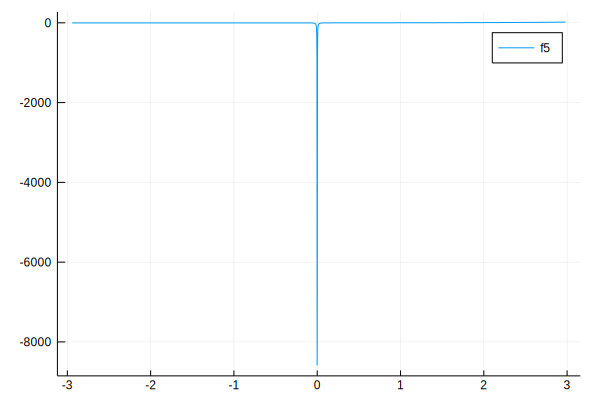

In [4]:
plot(x->f5(x),-3,3, label="f5")

# 1. Metoda bisekcji

In [5]:
# miejsca zerowe:
x1 = find_zero(f1, (-4, 2), Bisection())
x2 = find_zero(f2, (-5, 5), Bisection())
x3 = find_zero(f3, (-4, 2), Bisection())
x4 = find_zero(f4, (-5, 5), Bisection())
x5 = find_zero(f5, (-4, 2), Bisection())
x6 = find_zero(f6, (-4, 2), Bisection())

0.0

In [6]:
#Sprawdzamy czy znaleźliśmy 0
data = DataFrame(fun = [f1,f2,f3,f4,f5,f6], xZero=[x1,x2,x3,x4,x5,x6], bisection=[iszero(f1(x1)),iszero(f2(x2)),iszero(f3(x3)),iszero(f4(x4)),iszero(f5(x5)), iszero(f6(x6))])
data

,fun,xZero,bisection
,Function,Float64,Bool
1,f1,-3.0,true
2,f2,0.0,true
3,f3,0.351734,true
4,f4,2.09455,false
5,f5,0.0,false
6,f6,0.0,true


In [7]:
#sprawdzam czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f4(prevfloat(x4))) *sign(f4(nextfloat(x4)))

-1.0

In [8]:
x4, f4(x4)

(2.094551481542327, 3.552713678800501e-15)

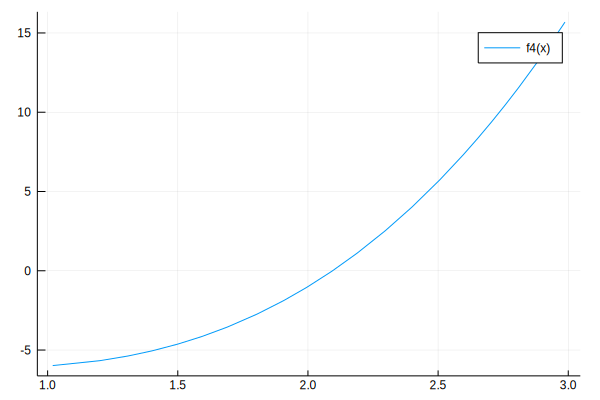

In [9]:
plot(x->f4(x),1,3,label="f4(x)")

In [10]:
sign(f5(prevfloat(x5))) *sign(f5(nextfloat(x5)))

NaN

In [11]:
x5,f5(x5)

(0.0, NaN)

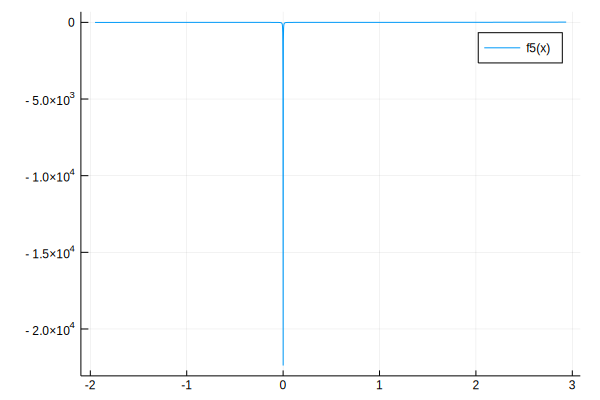

In [12]:
plot(x->f5(x),-2,3,label="f5(x)")

# 2. Metoda Newtona

In [13]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [14]:
N1 = find_zero((f1, D(f1)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.9999999893171166
* Algorithm: Roots.Newton()
* iterations: 26
* function evaluations: 53
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  3.0000000000000000
x_1 =  0.6000000000000000,	 fx_1 =  0.5760000000000002
x_2 =  0.8117647058823529,	 fx_2 =  0.1350604518624058
x_3 =  0.9082650781831720,	 fx_3 =  0.0328892070132730
x_4 =  0.9546772328747365,	 fx_4 =  0.0081235129715387
x_5 =  0.9774692207697649,	 fx_5 =  0.0020191066159544
x_6 =  0.9887666079847495,	 fx_6 =  0.0005033388530879
x_7 =  0.9943912241748282,	 fx_7 =  0.0001256570221040
x_8 =  0.9971975823794025,	 fx_8 =  0.0000313921691694
x_9 =  0.9985992825526103,	 fx_9 =  0.0000078452892489
x_10 =  0.9992997639663359,	 fx_10 =  0.0000019609786643
x_11 =  0.9996499126368736,	 fx_11 =  0.0000004902017402
x_12 =  0.9998249639795151,	 fx_12 =  0.0000001225450712
x_13 =  0.9999124839047338,	 fx_13 =  0.0000000306355974


0.9999999893171166

In [15]:
N2 = find_zero((f2, D(f2)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



0.0

In [16]:
N3 = find_zero((f3, D(f3)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.3333333333333333,	 fx_1 = -0.0498646439071226
x_2 =  0.3516893315554154,	 fx_2 = -0.0001199797491258
x_3 =  0.3517337109929426,	 fx_3 = -0.0000000006927722
x_4 =  0.3517337112491958,	 fx_4 =  0.0000000000000000



0.35173371124919584

In [17]:
N4 = find_zero((f4, D(f4)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 19
* function evaluations: 39
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -5.0000000000000000
x_1 = -2.5000000000000000,	 fx_1 = -15.6250000000000000
x_2 = -1.5671641791044775,	 fx_2 = -5.7146324514651070
x_3 = -0.5025924450866797,	 fx_3 = -4.1217695422221725
x_4 = -3.8207064676993294,	 fx_4 = -53.1324879623681738
x_5 = -2.5493933913606064,	 fx_5 = -16.4707576140240164
x_6 = -1.6081114997282251,	 fx_6 = -5.9423896750176617
x_7 = -0.5761004336602393,	 fx_7 = -4.0390020905449111
x_8 = -4.5977095833821693,	 fx_8 = -92.9952575692345391
x_9 = -3.0835431467266550,	 fx_9 = -28.1519768702820130
x_10 = -2.0221942554643366,	 fx_10 = -9.2249089970538503
x_11 = -1.1237641075795191,	 fx_11 = -4.1716125339957122
x_12 =  1.2086516123957836,	 fx_12 = -5.6516581502357903
x_13 =  3.5807900448965704,	 fx_13 =  33.75151520853

2.0945514815423265

In [18]:
N5 = find_zero((f5, D(f5)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

In [19]:
N5 = NaN

NaN

In [20]:
N6 = find_zero((f6, D(f6)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 0
* function evaluations: 1
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  0.0000000000000000



0.0

In [21]:
newtonData = DataFrame(fun = [f1,f2,f3,f4,f5,f6], xZero=[N1,N2,N3,N4,N5,N6], Newton=[iszero(f1(N1)),iszero(f2(N2)),iszero(f3(N3)),iszero(f4(N4)),iszero(f5(N5)),
        iszero(f6(N6))], it=[26,0,4,19,NaN,0], ev=[53,1,9,39,NaN,1])



,fun,xZero,Newton,it,ev
,Function,Float64,Bool,Float64,Float64
1,f1,1.0,false,26.0,53.0
2,f2,0.0,true,0.0,1.0
3,f3,0.351734,true,4.0,9.0
4,f4,2.09455,false,19.0,39.0
5,f5,NaN,false,NaN,NaN
6,f6,0.0,true,0.0,1.0


In [22]:
join(data, newtonData, on= :fun)

┌ Warning: Duplicate variable names are deprecated: pass makeunique=true to add a suffix automatically.
│   caller = ip:0x0
└ @ Core :-1


,fun,xZero,bisection,xZero_1,Newton,it,ev
,Function,Float64,Bool,Float64,Bool,Float64,Float64
1,f1,-3.0,true,1.0,false,26.0,53.0
2,f2,0.0,true,0.0,true,0.0,1.0
3,f3,0.351734,true,0.351734,true,4.0,9.0
4,f4,2.09455,false,2.09455,false,19.0,39.0
5,f5,0.0,false,NaN,false,NaN,NaN
6,f6,0.0,true,0.0,true,0.0,1.0


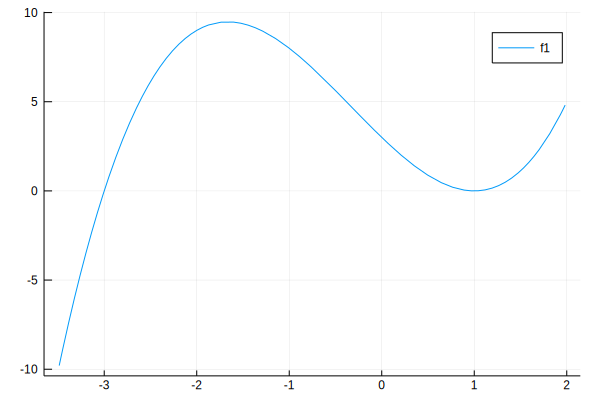

In [23]:
plot(x -> f1(x),-3.5,2,label="f1")

In [24]:
sign(f1(prevfloat(N1))) *sign(f1(nextfloat(N1)))

1.0

In [25]:
N1, f1(N1)

(0.9999999893171166, 4.564959859473074e-16)

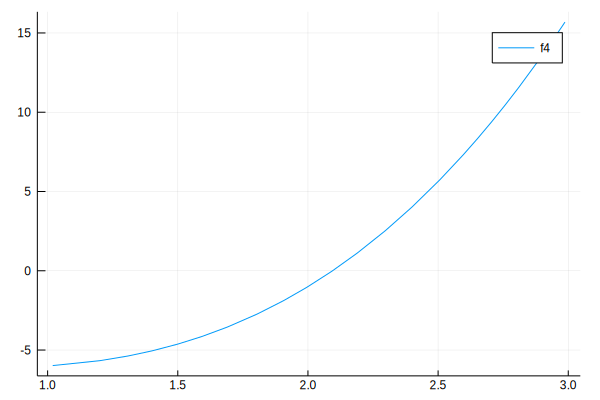

In [26]:
plot(x -> f4(x),1,3,label="f4")

In [27]:
sign(f4(prevfloat(N4))) *sign(f1(nextfloat(N4)))

-1.0

In [28]:
N4,f4(N4)

(2.0945514815423265, -8.881784197001252e-16)

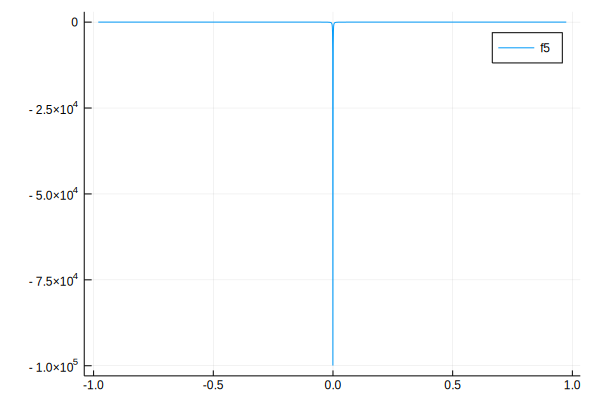

In [29]:
plot(x-> f5(x),-1,1,label="f5")

In [30]:
sign(f5(prevfloat(N5))) *sign(f1(nextfloat(N5)))

NaN

In [31]:
N5, f5(N5)

(NaN, NaN)

# 3. Metoda siecznych

In [32]:
S1 = find_zero(f1, -4, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Roots.Secant()
* iterations: 8
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -4.0000000000000000,	 fx_0 = -25.0000000000000000
x_1 = -3.2857129262851190,	 fx_1 = -5.2477851127736566
x_2 = -3.0959405340197992,	 fx_2 = -1.6095683257636169
x_3 = -3.0119841208711278,	 fx_3 = -0.1928966083117643
x_4 = -3.0005524623274464,	 fx_4 = -0.0088418391247485
x_5 = -3.0000032948909343,	 fx_5 = -0.0000527183417995
x_6 = -3.0000000009099619,	 fx_6 = -0.0000000145593901
x_7 = -3.0000000000000013,	 fx_7 = -0.0000000000000213
x_8 = -3.0000000000000000,	 fx_8 =  0.0000000000000000



-3.0

In [33]:
S2 = find_zero(f2, -1, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: -8.041069570498994e-19
* Algorithm: Roots.Secant()
* iterations: 9
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -2.7182818284590451
x_1 = -0.4999977291793846,	 fx_1 = -0.8243550194353155
x_2 = -0.2823655695224345,	 fx_2 = -0.3744911408566633
x_3 = -0.1011967323743296,	 fx_3 = -0.1119736079155024
x_4 = -0.0239214048560102,	 fx_4 = -0.0245005376853914
x_5 = -0.0022771768778110,	 fx_5 = -0.0022823683210177
x_6 = -0.0000537668632335,	 fx_6 = -0.0000537697541868
x_7 = -0.0000001222940771,	 fx_7 = -0.0000001222940920
x_8 = -0.0000000000065752,	 fx_8 = -0.0000000000065752
x_9 = -0.0000000000000000,	 fx_9 = -0.0000000000000000



-8.041069570498994e-19

In [34]:
S3 = find_zero(f3, -1, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -4.7182818284590446
x_1 =  0.0000017443542752,	 fx_1 = -0.9999947669386956
x_2 =  0.2689418489611959,	 fx_2 = -0.2263039947419349
x_3 =  0.3476066362457234,	 fx_3 = -0.0111634120640596
x_4 =  0.3516884669466453,	 fx_4 = -0.0001223172180252
x_5 =  0.3517336869345857,	 fx_5 = -0.0000000657337564
x_6 =  0.3517337112490527,	 fx_6 = -0.0000000000003870
x_7 =  0.3517337112491958,	 fx_7 =  0.0000000000000000



0.35173371124919584

In [35]:
S4 = find_zero(f4, 2, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Secant()
* iterations: 5
* function evaluations: 7
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  2.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  2.0999996366704710,	 fx_1 =  0.0609959198102201
x_2 =  2.0942507268909742,	 fx_2 = -0.0033562859615666
x_3 =  2.0945505609829969,	 fx_3 = -0.0000102747603083
x_4 =  2.0945514816982134,	 fx_4 =  0.0000000017399193
x_5 =  2.0945514815423265,	 fx_5 = -0.0000000000000009



2.0945514815423265

In [36]:
S5 = find_zero(f5, -1, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: -0.30546863861474094
* Algorithm: Roots.Secant()
* iterations: 16
* function evaluations: 18
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: x_n ≈ x_{n-1}. 

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.6421225588285577
x_1 =  3.7204470487986665,	 fx_1 =  39.2821230160329193
x_2 = -0.8105877707040845,	 fx_2 = -1.5706265698550448
x_3 = -0.6363874109097538,	 fx_3 = -1.4954990327483795
x_4 =  2.8312687856052814,	 fx_4 =  14.9657272226645919
x_5 = -0.3213515559055207,	 fx_5 = -1.3717285219963937
x_6 = -0.0566506557736491,	 fx_6 = -4.1820238482893206
x_7 = -0.4505542667778941,	 fx_7 = -1.4120083241900103
x_8 = -0.6513456243813314,	 fx_8 = -1.5022344112571646
x_9 =  2.6917638540383884,	 fx_9 =  12.7563033296358128
x_10 = -0.2991261899382893,	 fx_10 = -1.3703701039138889
x_11 = -0.0089923293631994,	 fx_11 = -127.4269651538968873
x_12 = -0.3022802555269051,	 fx_12 = -1.3703826172719538
x_13 = -0.3054686386147435,	 fx_13 = -1.

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = -0.30546863861474094")

In [37]:
S5 = NaN #error!!!!!

NaN

In [38]:
S6 = find_zero(f6, -1, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: -8.971730607213444e-6
* Algorithm: Roots.Secant()
* iterations: 41
* function evaluations: 43
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 = -0.6666646481619485,	 fx_1 = -0.2962936049648208
x_2 = -0.5263147326927622,	 fx_2 = -0.1457929692901063
x_3 = -0.3903549686417063,	 fx_3 = -0.0594811196591394
x_4 = -0.2966593865295631,	 fx_4 = -0.0261080408112663
x_5 = -0.2233605430884194,	 fx_5 = -0.0111434423527916
x_6 = -0.1687782942777193,	 fx_6 = -0.0048078374984879
x_7 = -0.1273580055099287,	 fx_7 = -0.0020657546904808
x_8 = -0.0961539311642222,	 fx_8 = -0.0008889987165791
x_9 = -0.0725803248595983,	 fx_9 = -0.0003823461514761
x_10 = -0.0547904659547026,	 fx_10 = -0.0001644807135846
x_11 = -0.0413597505756828,	 fx_11 = -0.0000707511874309
x_12 = -0.0312216532214537,	 fx_12 = -0.0000304346062313
x_13 = -0.0235684993147962,	 fx_13 = -0.00001309169235

-8.971730607213444e-6

In [39]:
sData = DataFrame(fun = [f1,f2,f3,f4,f5,f6], xZero=[S1,S2,S3,S4,S5,S6], 
    Sieczne=[iszero(f1(S1)),iszero(f2(S2)),iszero(f3(S3)),iszero(f4(S4)),iszero(f5(S5)), iszero(f6(S6))]
,it=[8,9,7,5,16,41], ev=[10,11,9,7,18,43])

,fun,xZero,Sieczne,it,ev
,Function,Float64,Bool,Int64,Int64
1,f1,-3.0,true,8,10
2,f2,-8.04107e-19,false,9,11
3,f3,0.351734,true,7,9
4,f4,2.09455,false,5,7
5,f5,NaN,false,16,18
6,f6,-8.97173e-6,false,41,43


In [40]:
join(sData,join(data, newtonData,  on= :fun), on=:fun)

,fun,xZero,Sieczne,it,ev,xZero_2,bisection,xZero_1,Newton,it_1,ev_1
,Function,Float64,Bool,Int64,Int64,Float64,Bool,Float64,Bool,Float64,Float64
1,f1,-3.0,true,8,10,-3.0,true,1.0,false,26.0,53.0
2,f2,-8.04107e-19,false,9,11,0.0,true,0.0,true,0.0,1.0
3,f3,0.351734,true,7,9,0.351734,true,0.351734,true,4.0,9.0
4,f4,2.09455,false,5,7,2.09455,false,2.09455,false,19.0,39.0
5,f5,NaN,false,16,18,0.0,false,NaN,false,NaN,NaN
6,f6,-8.97173e-6,false,41,43,0.0,true,0.0,true,0.0,1.0


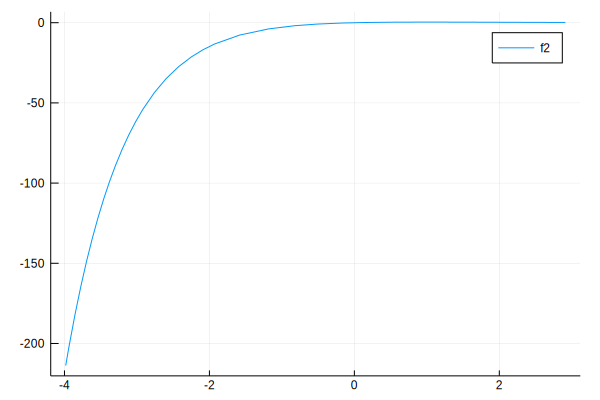

In [41]:
plot(x->f2(x),-4,3,label="f2")

In [42]:
sign(f2(prevfloat(S2))) *sign(f2(nextfloat(S2)))

1.0

In [43]:
S2, f2(S2)

(-8.041069570498994e-19, -8.041069570498994e-19)

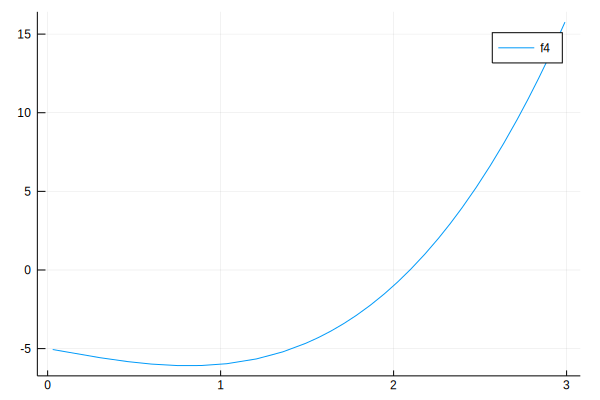

In [44]:
plot(x->f4(x),0,3,label="f4")

In [45]:
sign(f4(prevfloat(S4))) *sign(f4(nextfloat(S4)))

-1.0

In [46]:
S4, f4(S4)

(2.0945514815423265, -8.881784197001252e-16)

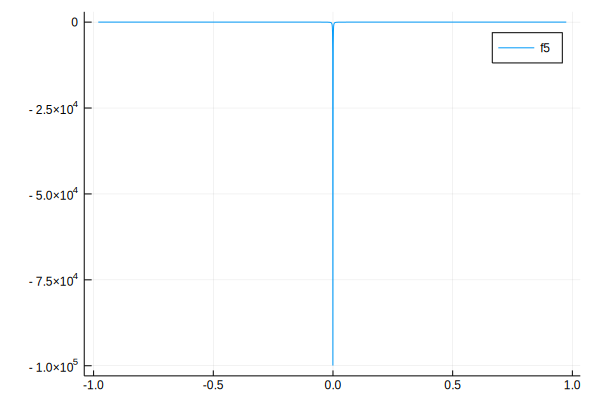

In [47]:
plot(x-> f5(x), -1,1,label = "f5")

In [48]:
sign(f5(prevfloat(S5))) *sign(f5(nextfloat(S5)))

NaN

In [49]:
S5, f5(S5)

(NaN, NaN)

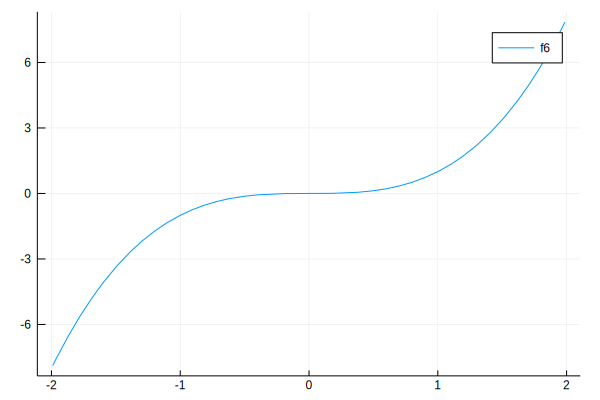

In [50]:
plot(x->f6(x), -2,2, label="f6")

In [51]:
sign(f6(prevfloat(S6))) *sign(f6(nextfloat(S6)))

1.0

In [52]:
S6, f6(S6)

(-8.971730607213444e-6, -7.221520922424894e-16)

# Zadanie 2.

### problemy z f5(x) = f5(x) = exp(x) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3

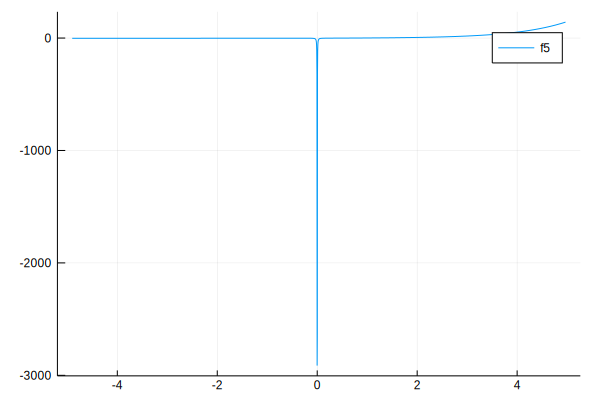

In [53]:
plot(x->f5(x),-5,5,label="f5")

In [54]:
# bisekcja:
x5,f5(x5)

(0.0, NaN)

In [55]:
# Newton:
N5,f5(N5)

(NaN, NaN)

In [56]:
N5 = find_zero((f5, D(f5)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.0000000000000000,	 fx_0 =                NaN



Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = 0.0")

In [57]:
# sieczne:
S5, f5(S5)

(NaN, NaN)

In [58]:
S5 = find_zero(f5, -1, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: -0.30546863861474094
* Algorithm: Roots.Secant()
* iterations: 16
* function evaluations: 18
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: x_n ≈ x_{n-1}. 

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.6421225588285577
x_1 =  3.7204470487986665,	 fx_1 =  39.2821230160329193
x_2 = -0.8105877707040845,	 fx_2 = -1.5706265698550448
x_3 = -0.6363874109097538,	 fx_3 = -1.4954990327483795
x_4 =  2.8312687856052814,	 fx_4 =  14.9657272226645919
x_5 = -0.3213515559055207,	 fx_5 = -1.3717285219963937
x_6 = -0.0566506557736491,	 fx_6 = -4.1820238482893206
x_7 = -0.4505542667778941,	 fx_7 = -1.4120083241900103
x_8 = -0.6513456243813314,	 fx_8 = -1.5022344112571646
x_9 =  2.6917638540383884,	 fx_9 =  12.7563033296358128
x_10 = -0.2991261899382893,	 fx_10 = -1.3703701039138889
x_11 = -0.0089923293631994,	 fx_11 = -127.4269651538968873
x_12 = -0.3022802555269051,	 fx_12 = -1.3703826172719538
x_13 = -0.3054686386147435,	 fx_13 = -1.

Roots.ConvergenceFailed: Roots.ConvergenceFailed("Stopped at: xn = -0.30546863861474094")

# Zadanie 3. a)

### wszystkie nie działają dla z pozoru prostego f4(x) = x^3 - 2*x - 5

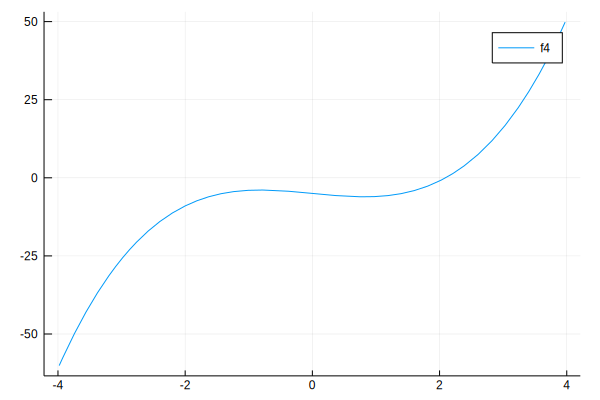

In [59]:
plot(x->f4(x),-4,4,label="f4")

In [60]:
x4,f4(x4)

(2.094551481542327, 3.552713678800501e-15)

In [61]:
N4, f4(N4)

(2.0945514815423265, -8.881784197001252e-16)

In [62]:
S4, f4(S4)

(2.0945514815423265, -8.881784197001252e-16)

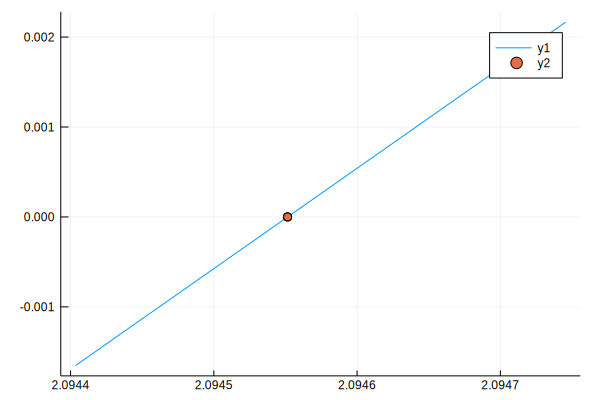

In [63]:
plot(x->f4(x),2.0944,2.09475)
scatter!([x4,N4,S4],[f4(x4),f4(N4),f4(S4)])

In [64]:
sign(f4(prevfloat(x4))) *sign(f4(nextfloat(x4))),
sign(f4(prevfloat(N4))) *sign(f4(nextfloat(N4))),
sign(f4(prevfloat(S4))) *sign(f4(nextfloat(S4)))

(-1.0, -1.0, -1.0)

In [65]:
iszero(f4(x4)),iszero(f4(N4)), iszero(f4(S4))

(false, false, false)

# zadanie 3.

### basen Newton'a

In [2]:
using PyPlot

In [3]:
using Reduce,Fatou

In [8]:
map(display,[basin(newton(:(z^3-1)),i) for i ∈ 1:3])

L"$\displaystyle D_1(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 z^{3}+1\right)/\left(3 z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

L"$\displaystyle D_2(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)/\left(9 \left(2 z^{3}+1
\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

L"$\displaystyle D_3(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)^{3}+729 \left(2 z^{
3}+1\right)^{6} z^{6}\right)/\left(27 \left(2 \left(2 z^{3}+1\right)^{3}+27 z
^{6}\right)^{2} \left(2 z^{3}+1\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

3-element Array{Nothing,1}:
 nothing
 nothing
 nothing

  0.650956 seconds (15.90 M allocations: 430.688 MiB, 20.51% gc time)


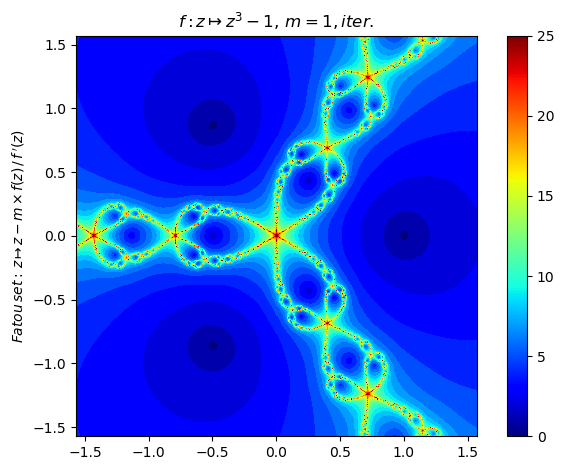

L"$\displaystyle D_3(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)^{3}+729 \left(2 z^{
3}+1\right)^{6} z^{6}\right)/\left(27 \left(2 \left(2 z^{3}+1\right)^{3}+27 z
^{6}\right)^{2} \left(2 z^{3}+1\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

In [7]:
nf = newton(:(z^3-1),n=800,ϵ=0.1,N=25,iter=true,cmap="jet")
nf |> fatou |> plot
basin(nf,3)

  0.608210 seconds (16.49 M allocations: 447.235 MiB, 9.83% gc time)


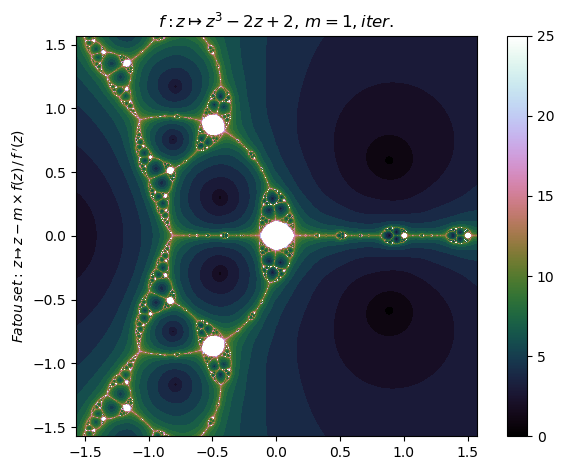

L"$\displaystyle D_3(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(4 \left(64 z^{18}+144 z^{17}+324 z^{16}-1128 z^{15}-2610 z^{14}+9603 z^{
12}+5220 z^{11}-14580 z^{10}-12344 z^{9}+13410 z^{8}+10368 z^{7}-6504 z^{6}-
3600 z^{5}+1620 z^{4}-288 z^{3}+288 z^{2}+16\right) \left(4 z^{9}-9 z^{8}-6 z
^{6}+18 z^{5}-9 z^{2}+2\right)\right)/\left(\left(2 \left(\left(3 z^{2}-2
\right)^{2}-6 \left(z^{2}+z+1\right)^{2} \left(z-1\right)^{2}\right)^{2} 
\left(3 z^{2}-2\right)^{2}-3 \left(4 z^{6}+6 z^{5}+9 z^{4}-12 z^{3}-18 z^{2}+
12\right)^{2} \left(2 z-3\right)^{2} z^{4}\right) \left(\left(3 z^{2}-2\right)
^{2}-6 \left(z^{2}+z+1\right)^{2} \left(z-1\right)^{2}\right) \left(3 z^{2}-2
\right)\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

In [6]:
nf1 = newton(:(z^3-2z+2),n=800,ϵ=0.1,N=25,iter=true,cmap="cubehelix")
nf1 |> fatou |> plot
basin(nf1,3)